# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Adrian Putra Ramadhan
- Email: adrianramadhan881@gmail.com
- Id Dicoding: adrian_ramadhan

## Persiapan

### Menyiapkan library yang dibutuhkan

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

### 2.1 Informasi Dataset

In [53]:
# Baca dataset dengan pemisah titik koma
data = pd.read_csv('./data.csv', sep=';')
print(f"Shape: {data.shape}")

Shape: (4424, 37)


In [54]:
# Tampilkan 5 baris pertama
display(data.head())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [55]:
# Info kolom dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### 2.2 Statistik Deskriptif
- **Ringkasan numerik** (mean, std, min, max, quartile)  
- **Ringkasan kategorikal** (frekuensi tiap level)

In [56]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

In [57]:
# Statistik deskriptif numerik
display(data[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [58]:
# Statistik deskriptif kategorikal
for col in cat_cols + ['Status']:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())


Column: Status
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Column: Status
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


### 2.3 Pengecekan Missing Values

In [59]:
# Cek missing per kolom
missing = data.isna().sum()
print(missing[missing>0])

Series([], dtype: int64)


### 2.4 Distribusi Variabel Numerik
- Histogram untuk melihat sebaran
- Boxplot untuk deteksi outlier


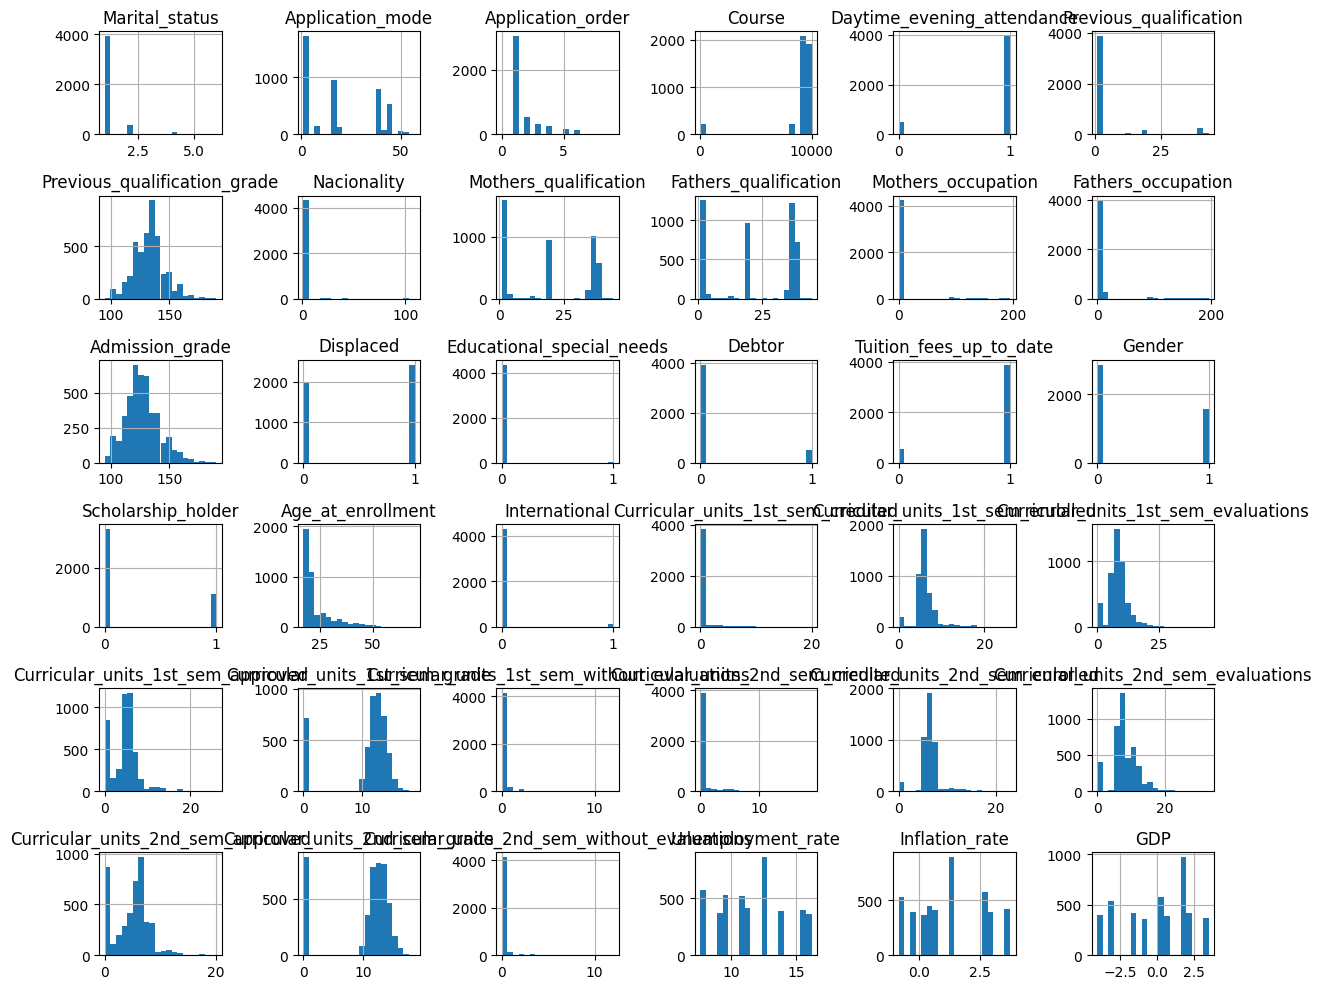

In [60]:
# Histogram semua numerik
data[num_cols].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

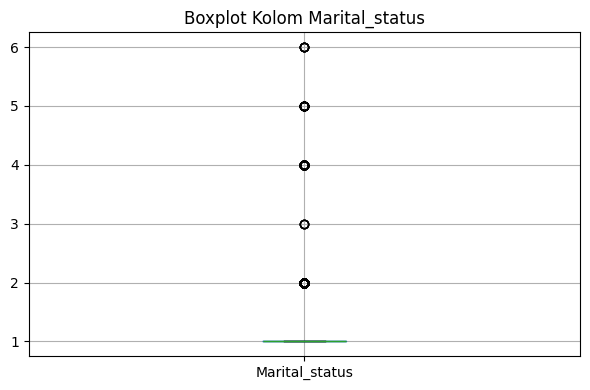

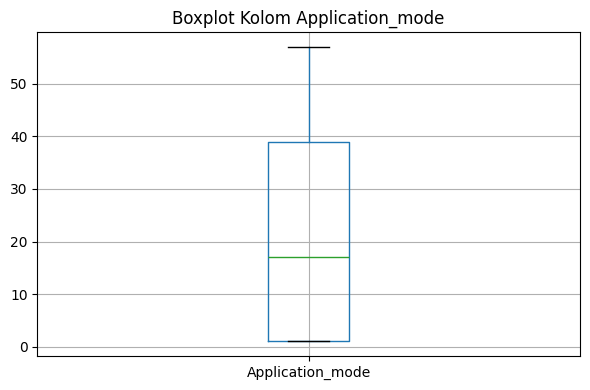

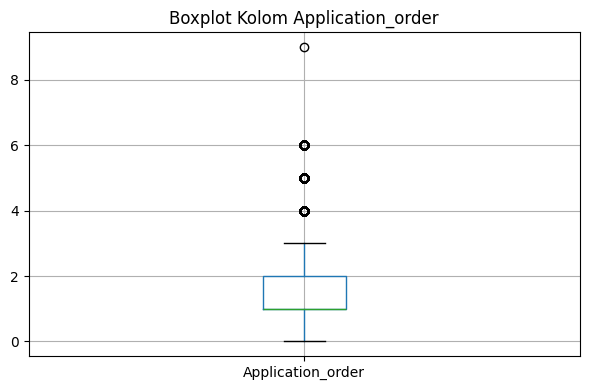

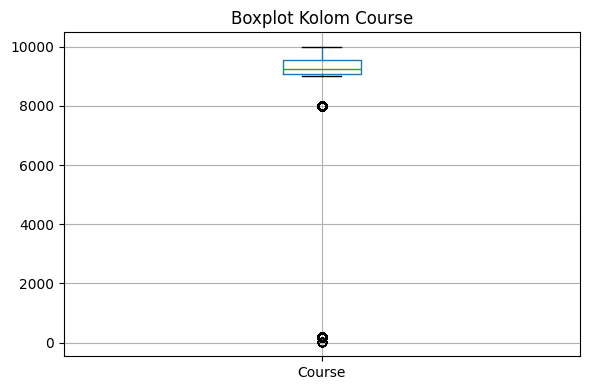

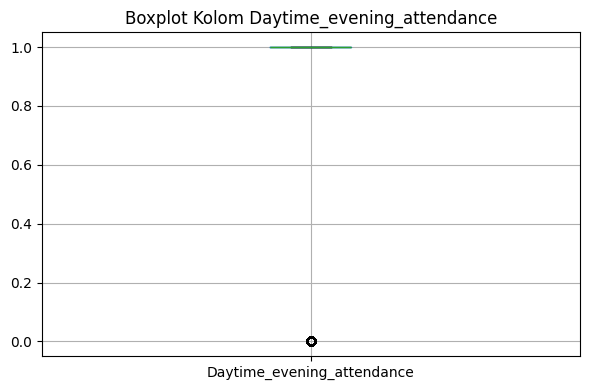

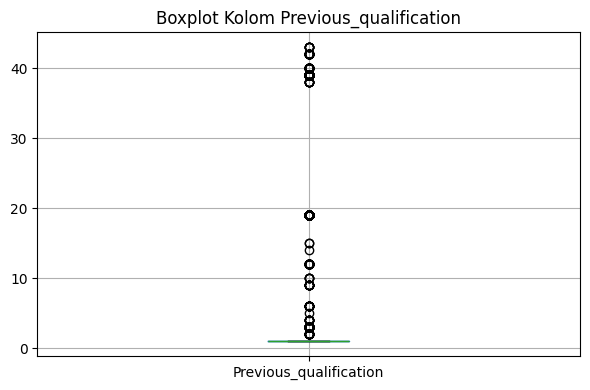

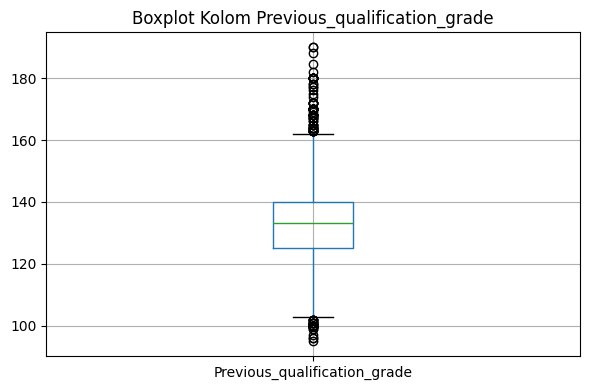

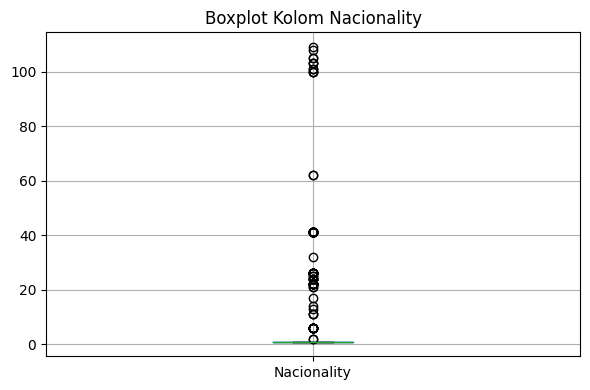

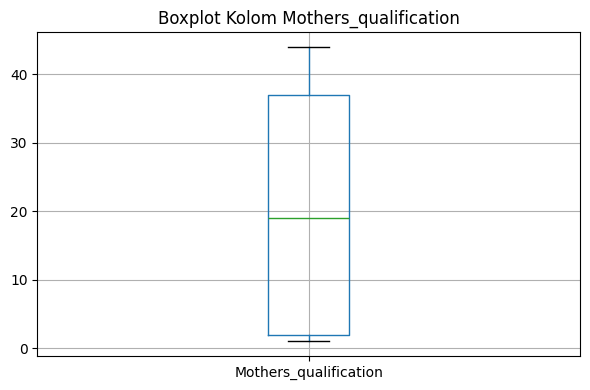

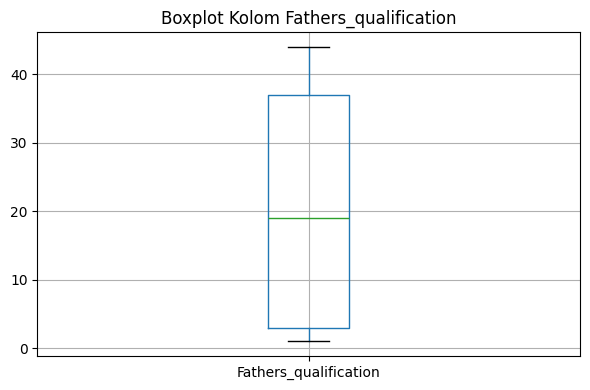

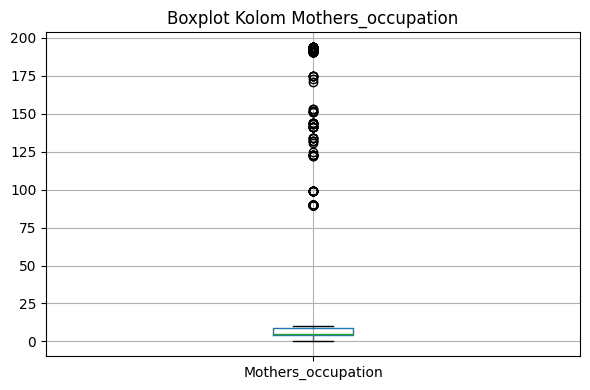

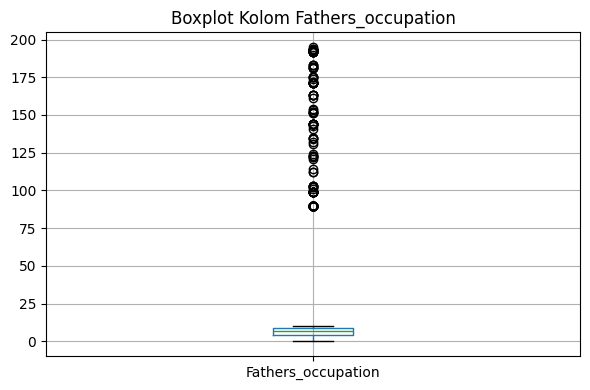

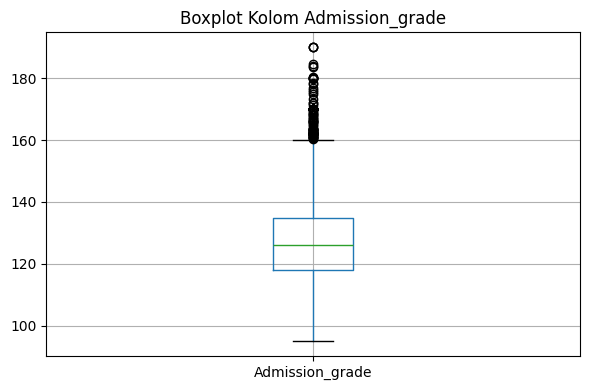

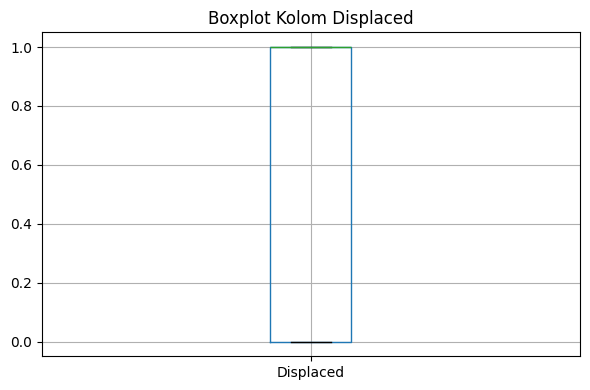

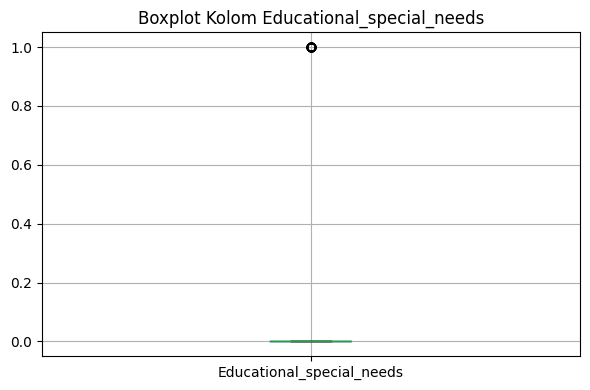

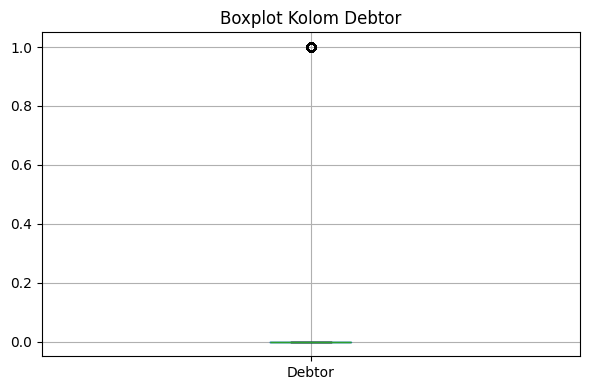

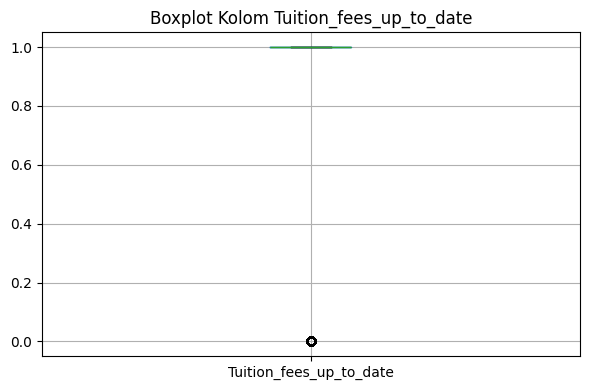

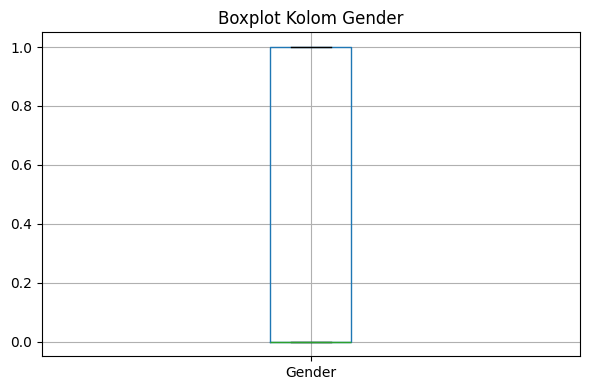

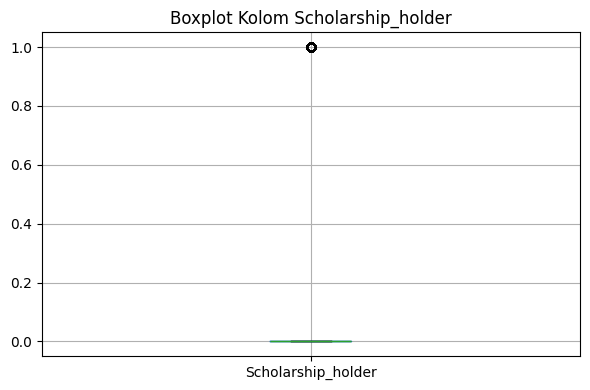

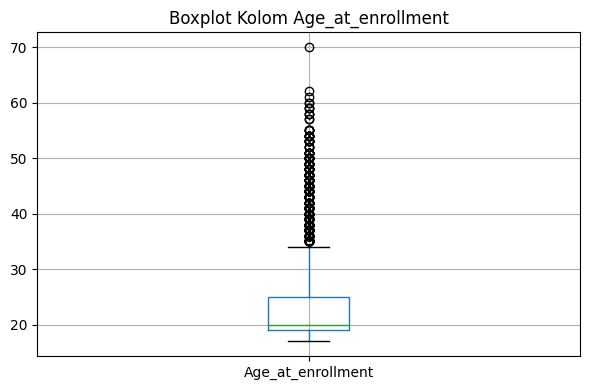

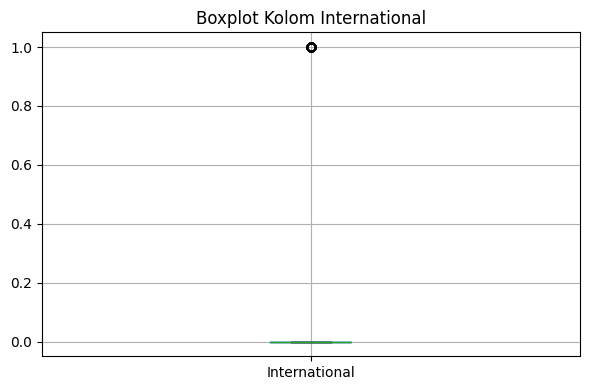

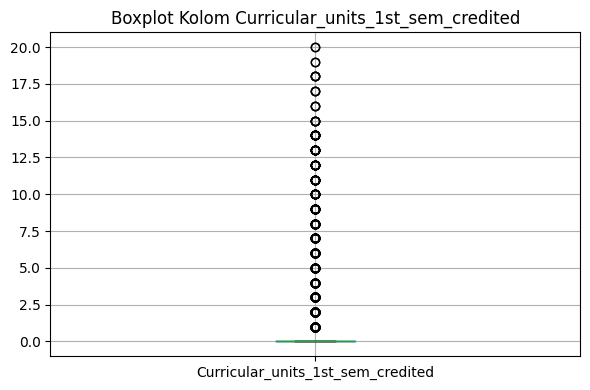

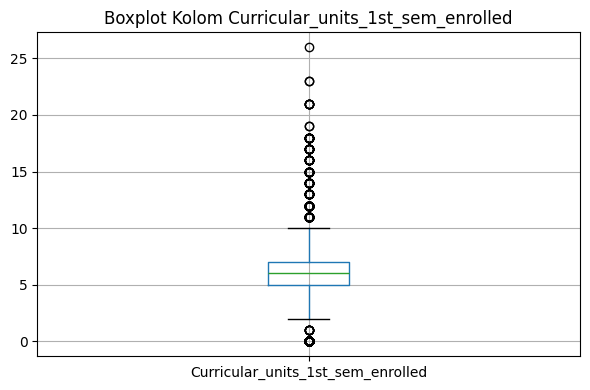

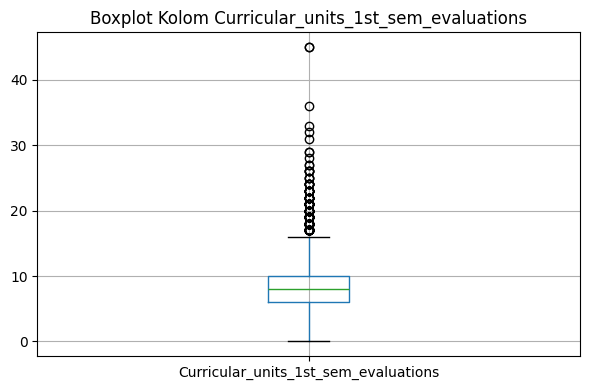

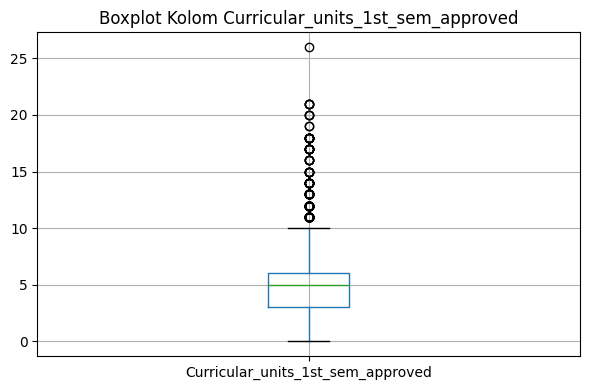

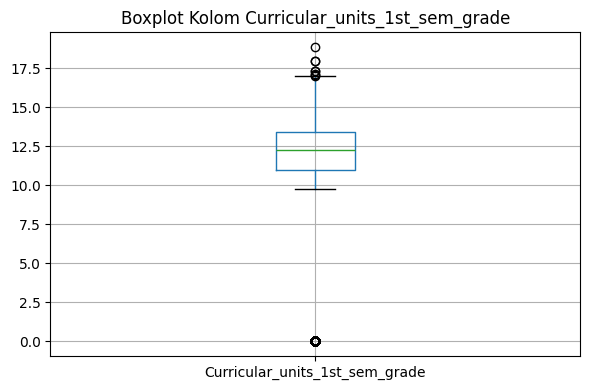

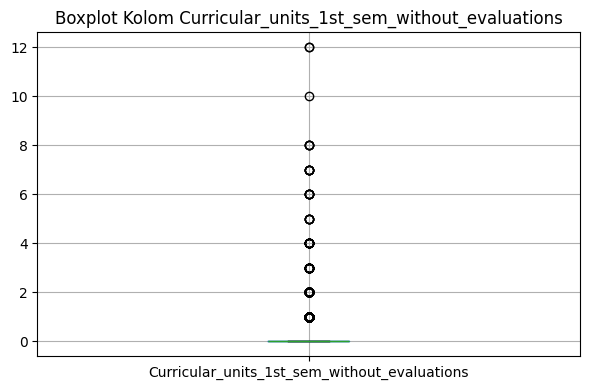

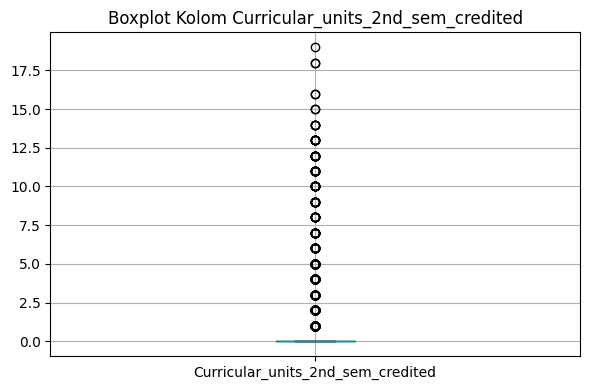

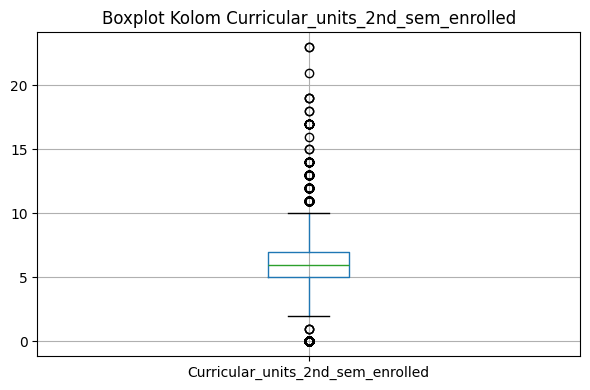

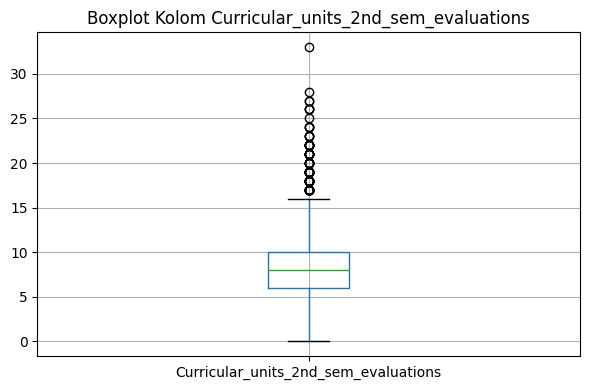

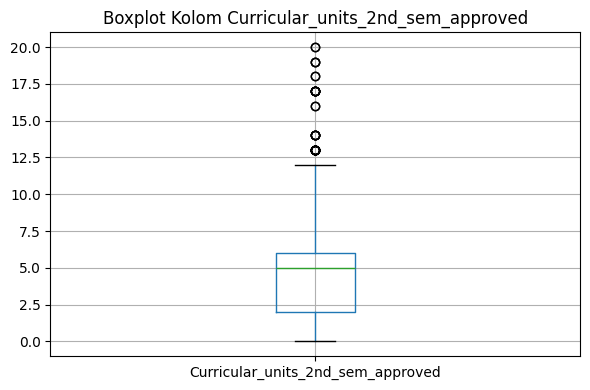

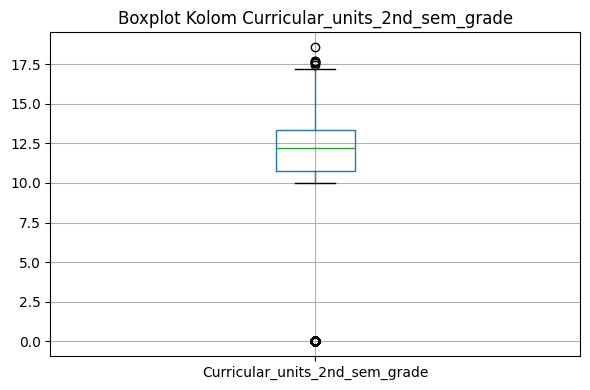

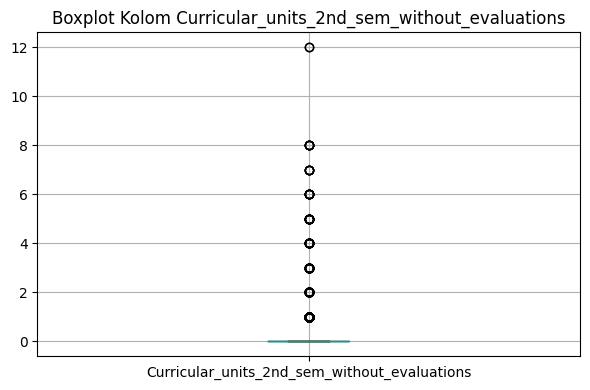

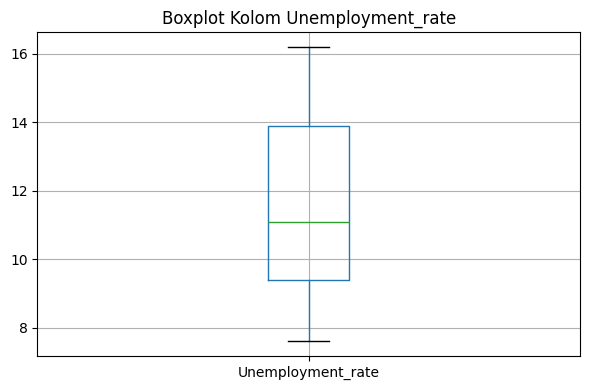

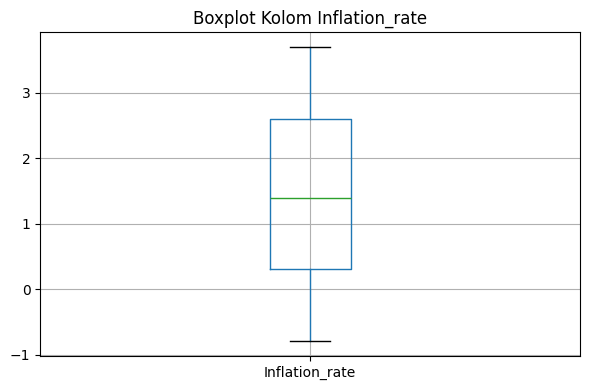

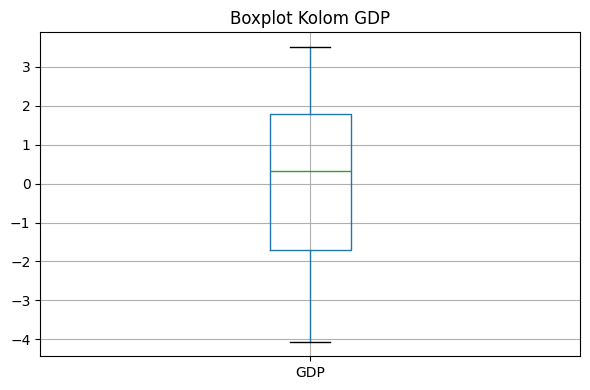

In [61]:
# Boxplot untuk setiap kolom numerik pada canvas terpisah
for col in num_cols:
    plt.figure(figsize=(6, 4))
    data.boxplot(column=col)
    plt.title(f'Boxplot Kolom {col}')
    plt.tight_layout()
    plt.show()

### 2.5 Distribusi Variabel Kategorikal
- Bar chart frekuensi

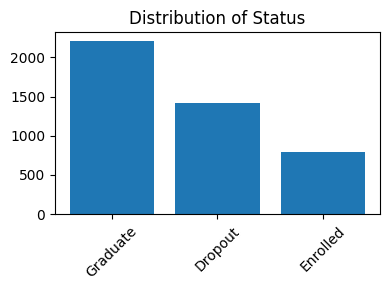

In [62]:
for col in ['Status']:
    counts = data[col].value_counts()
    plt.figure(figsize=(4,3))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 2.6 Analisis Korelasi
- Correlation matrix antar fitur numerik
- Heatmap untuk memvisualisasikan korelasi

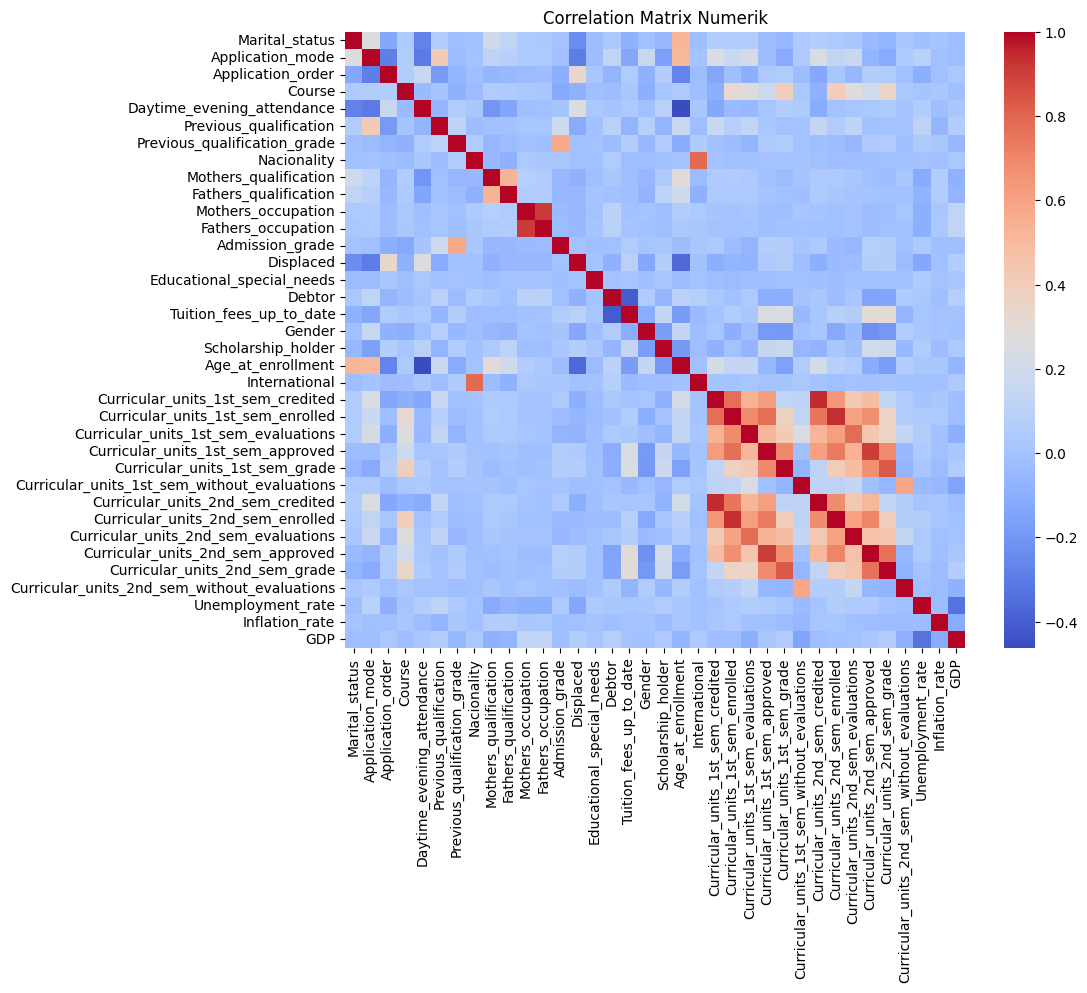

In [63]:
corr = data[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Numerik')
plt.show()

### 2.7 Insight Awal

#### Fitur yang Paling "Berkorelasi" dengan Status (Target)
- **Fitur Akademik**:  
  - `Admission_grade` (nilai penerimaan) dan `Previous_qualification_grade` (nilai kualifikasi sebelumnya) cenderung lebih tinggi pada mahasiswa yang **lulus (Graduate)** dibandingkan yang **dropout** atau **masih terdaftar (Enrolled)**.  
  - Variabel terkait prestasi akademik semester 1 & 2 (contoh: jumlah mata kuliah yang lulus, nilai semester) saling berkorelasi sangat kuat (terlihat sebagai cluster merah di heatmap) dan menunjukkan perbedaan rata-rata yang signifikan antar kelas **Status**.

- **Fitur Demografi**:  
  - Variabel demografi (usia, kondisi finansial, beasiswa, dll.) memiliki korelasi lemah dengan **Status**.

#### Outlier Ekstrem
- **Outlier Terdeteksi**:  
  - Banyak Outlier
- **Rekomendasi Penanganan**:  
  - Gunakan **robust scaler** untuk mengurangi dampak outlier pada model linear.  
  - Lakukan **winsorisasi** (misalnya, batasi nilai pada persentil ke-1–99).

#### Pemeriksaan Keseimbangan Kelas
- Distribusi Kelas:  
  - **Lulus (Graduate)**: ≈50%  
  - **Dropout**: ≈32%  
  - **Masih Terdaftar (Enrolled)**: ≈18%  
- **Rekomendasi**:  
  - Gunakan **stratified sampling** saat membagi data latih/uji untuk mempertahankan distribusi kelas asli dan memastikan evaluasi model yang adil.

#### Poin Penting
1. **Fokus pada fitur akademik** (`Admission_grade`, `Previous_qualification_grade`, nilai semester, jumlah mata kuliah yang lulus) untuk pemodelan prediktif.  
2. **Tangani outlier** pada fitur nilai dengan scaling atau winsorisasi.  
3. **Stratified sampling wajib digunakan** untuk mengatasi ketidakseimbangan kelas dan memastikan evaluasi yang andal.

## Data Preparation / Preprocessing
1. Cek Missing Values
2. Outlier Treatment
3. Feature Engineering
4. Encoding Variabel Kategorikal
5. Membangun Preprocessing Pipeline
6. Stratified Train/Test Split

### 3.1 Cek Missing Values

In [64]:
print(data.isnull().sum())
# → ternyata tidak ada missing, tapi kita tetap siapkan imputer di pipeline

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### 3.2 Outlier Treatment

Dari EDA kita tahu Admission_grade & Previous_qualification_grade punya outlier ekstrem.
Kita akan:

- Winsorize di batas 1%–99% untuk kedua kolom itu

- Gunakan RobustScaler (IQR–based) untuk seluruh numerik

In [65]:
#  define winsorize transformer untuk kedua fitur
def winsorize_grades(X_df):
    X = X_df.copy()
    for col in ['Admission_grade','Previous_qualification_grade']:
        X[col] = winsorize(X[col], limits=[0.01,0.01])
    return X

winsorizer = FunctionTransformer(winsorize_grades)

In [66]:
# definer robust scaler transformer untuk seluruh fitur numerik yang terdapat outliers
def robust_scaler(X_df):
    X = X_df.copy()
    for col in num_cols:
        X[col] = RobustScaler().fit_transform(X[[col]])
    return X
robust_scaler_transformer = FunctionTransformer(robust_scaler)

In [67]:
for col in ['Admission_grade','Previous_qualification_grade']:
    data[col] = winsorize(data[col], limits=[0.01,0.01])

### 3.3 Feature Engineering
Gabungkan performa semester 1 & 2 menjadi rata‑rata grade dan total units approved:

In [68]:
data['avg_sem_grade'] = (data['Curricular_units_1st_sem_grade'] + data['Curricular_units_2nd_sem_grade'])/2
data['total_units_approved'] = (data['Curricular_units_1st_sem_approved'] + data['Curricular_units_2nd_sem_approved'])
# tambahkan ke list numerik
num_cols += ['avg_sem_grade','total_units_approved']


### 3.4 Encoding Variabel Kategorikal
- **LabelEncoder** untuk target
- **OneHotEncoder** untuk fitur kategorikal

In [69]:
le = LabelEncoder()
y_enc = le.fit_transform(data['Status'])
X = data.drop('Status', axis=1)
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

### 3.5 Membangun Preprocessing Pipeline

In [70]:
# Numeric pipeline: imputer → winsorizer → robust scaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Categorical pipeline: imputer → one‑hot
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

### 3.6 Stratified Train/Test Split

Menjaga proporsi kelas (Graduate≈50%, Dropout≈32%, Enrolled≈18%).

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

## Modeling
Coba beberapa algortima:

- Logistic Regression
- Random Forest
- Gradient Boosting

In [72]:
# Fungsi untuk membangun & melatih model (return best estimator)
def build_model(model, param_grid=None):
    pipe = Pipeline([
        ('prep', preprocessor),
        ('clf', model)
    ])
    if param_grid:
        gs = GridSearchCV(pipe,
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1)
        gs.fit(X_train, y_train)
        print(f"→ Best params for {model.__class__.__name__}: {gs.best_params_}")
        return gs.best_estimator_
    else:
        return pipe.fit(X_train, y_train)

In [73]:
# 4.1 Logistic Regression (tanpa hyperparameter tuning)
logistic_model = build_model(LogisticRegression(max_iter=1000))

In [74]:
# 4.2 Random Forest (grid search)
rf_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth':    [None, 10, 20]
}
rf_model = build_model(RandomForestClassifier(random_state=42), param_grid=rf_param_grid)

→ Best params for RandomForestClassifier: {'clf__max_depth': None, 'clf__n_estimators': 200}


In [75]:
# 4.3 Gradient Boosting (grid search)
gb_param_grid = {
    'clf__n_estimators':   [100, 200],
    'clf__learning_rate':  [0.1, 0.01],
    'clf__max_depth':      [3, 5]
}
gb_model = build_model(GradientBoostingClassifier(random_state=42), param_grid=gb_param_grid)

→ Best params for GradientBoostingClassifier: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 200}


In [76]:
# Simpan model-model terlatih untuk evaluasi selanjutnya
models = {
    'LogisticRegression': logistic_model,
    'RandomForest':       rf_model,
    'GradientBoosting':   gb_model
}

## Evaluation

### 5.1 Hitung metrik untuk setiap model

In [79]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    # recall untuk kelas 'Dropout'
    # kita transform label 'Dropout' ke integer
    dropout_label = le.transform(['Dropout'])[0]
    rec_dropout = recall_score(y_test, y_pred, labels=[dropout_label], average=None)[0]
    results.append({
        'model': name,
        'accuracy': acc,
        'recall_dropout': rec_dropout
    })
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall (Dropout): {rec_dropout:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

--- LogisticRegression ---
Accuracy: 0.7729
Recall (Dropout): 0.7711
              precision    recall  f1-score   support

     Dropout       0.80      0.77      0.78       284
    Enrolled       0.54      0.34      0.42       159
    Graduate       0.81      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885

Confusion Matrix:
 [[219  28  37]
 [ 43  54  62]
 [ 13  18 411]]

--- RandomForest ---
Accuracy: 0.7751
Recall (Dropout): 0.7641
              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.79       284
    Enrolled       0.59      0.36      0.45       159
    Graduate       0.79      0.93      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.76      0.78      0.76       885

Confusion Matrix:
 [[217  20  47]
 [ 40 

### 5.2 Ringkasan perbandingan

In [80]:
results_df = pd.DataFrame(results).set_index('model')
print("Summary:\n", results_df.sort_values('accuracy', ascending=False))


Summary:
                     accuracy  recall_dropout
model                                       
RandomForest        0.775141        0.764085
LogisticRegression  0.772881        0.771127
GradientBoosting    0.767232        0.728873


### 5.3 Pilih model terbaik berdasarkan accuracy (atau recall_dropout)

In [81]:
best_name = results_df['accuracy'].idxmax()
best_model = models[best_name]
print(f"\n>> Best model: {best_name} <<")


>> Best model: RandomForest <<


### 5.4 Export model terbaik

In [82]:
joblib.dump(best_model, './model/best_model.joblib')
print("Model terbaik telah disimpan ke file: ./model/best_model.joblib")

Model terbaik telah disimpan ke file: ./model/best_model.joblib
